# Binary Search Tree (BST)
Binary search trees are binary trees that have the following properties:

- The left child's data should always be less than the parent's data.
- The right child's data should always be greater than the parent's data.

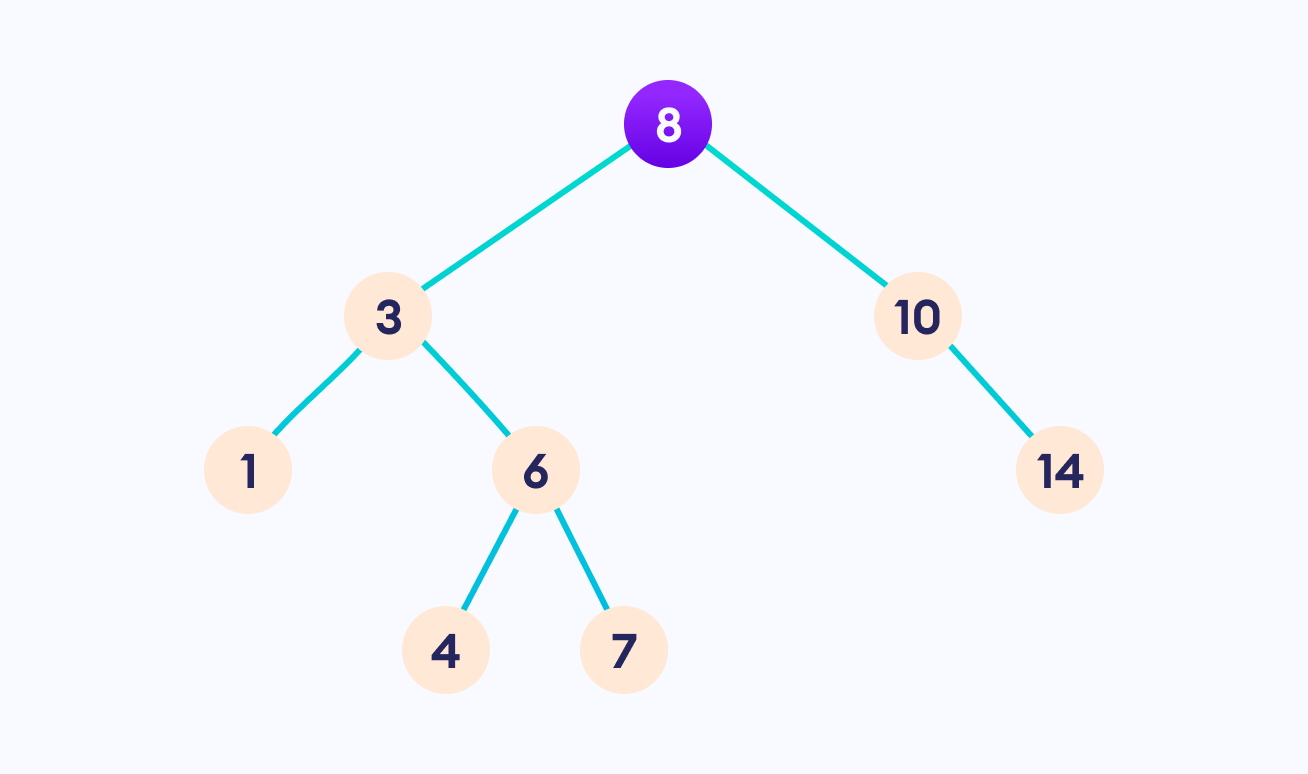

In the figure above:

- Every node to the right of a node is greater than the node.
- Every node to its left is smaller than the node.


In [1]:
class BinarySearchTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self, root=None):
        self.root = root

    def insert(self, value, current_node=None):
        if self.root is None:
            self.root = BinarySearchTreeNode(value)
            return
    
        if current_node is None:
            current_node = self.root

        if value < current_node.data:
            if current_node.left is None:
                current_node.left = BinarySearchTreeNode(value)
            else:
                self.insert(value, current_node.left)
        elif value > current_node.data:
            if current_node.right is None:
                current_node.right = BinarySearchTreeNode(value)
            else:
                self.insert(value, current_node.right)

    def search(self, value, current_node=None):
        if current_node is None:
            current_node = self.root

        if current_node is None:
            return None

        if value == current_node.data:
            return True
        elif value < current_node.data:
            return self.search(value, current_node.left) if current_node.left else None
        else:
            return self.search(value, current_node.right) if current_node.right else None

    def delete(self, root, key):
        if not root:
            return root

        if key < root.data:
            root.left = self.delete(root.left, key)
        elif key > root.data:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                temp = root.right
                root = None
                return temp
            elif not root.right:
                temp = root.left
                root = None
                return temp

            temp = root.right
            while temp.left:
                temp = temp.left
            root.data = temp.data
            root.right = self.delete(root.right, temp.data)

        return root

    def inorder_traversal(self, node, visited_nodes=None):
        if visited_nodes is None:
            visited_nodes = []

        if node:
            self.inorder_traversal(node.left, visited_nodes)
            visited_nodes.append(node.data)
            self.inorder_traversal(node.right, visited_nodes)

        return visited_nodes


bst = BinarySearchTree()

values_to_insert = [1,2,3,4,5]

for value in values_to_insert:
    bst.insert(value)

print(f'Inorder Traversal after Insertion {bst.inorder_traversal(bst.root)}')

values_to_search = [2,3,6]

for value in values_to_search:
    print(bst.search(value,bst.root))

values_to_delete = [2]

for value in values_to_delete:
    bst.root = bst.delete(bst.root, value)

print(f'Inorder Traversal after Deletion {bst.inorder_traversal(bst.root)}')

Inorder Traversal after Insertion [1, 2, 3, 4, 5]
True
True
None
Inorder Traversal after Deletion [1, 3, 4, 5]
